In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/thomassimmons/c/d/datasets/dirty_cafe_sales.csv")

In [3]:
df.shape

(10000, 8)

In [4]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors = 'coerce')

In [5]:
df.dtypes

Transaction ID       object
Item                 object
Quantity            float64
Price Per Unit       object
Total Spent          object
Payment Method       object
Location             object
Transaction Date     object
dtype: object

In [6]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors = 'coerce')

In [7]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors = 'coerce')

In [8]:
df['Payment Method'] = df['Payment Method'].replace({'UNKNOWN': pd.NA})

In [9]:
df['Location'] = df['Location'].replace({'UNKNOWN': pd.NA})

In [10]:
df.dropna(subset=['Quantity', 'Price Per Unit', 'Total Spent', 'Payment Method', 'Location'], inplace=True)

In [11]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors = 'coerce')

In [12]:
df.dropna(subset=['Transaction Date'], inplace=True)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
np.median([1,2,3,4])

2.5

In [15]:
print("Shape:", df.shape)

Shape: (3774, 8)


In [16]:
print("Missing values:", df.isna().sum())

Missing values: Transaction ID        0
Item                126
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date      0
dtype: int64


In [17]:
print("Data types:\n", df.dtypes)

Data types:
 Transaction ID              object
Item                        object
Quantity                   float64
Price Per Unit             float64
Total Spent                float64
Payment Method              object
Location                    object
Transaction Date    datetime64[ns]
dtype: object


In [18]:
print("\nUnique values per column:\n:", df.nunique)


Unique values per column:
: <bound method DataFrame.nunique of      Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
0       TXN_1961373    Coffee       2.0             2.0          4.0   
1       TXN_4977031      Cake       4.0             3.0         12.0   
2       TXN_3160411    Coffee       2.0             2.0          4.0   
3       TXN_4433211   UNKNOWN       3.0             3.0          9.0   
4       TXN_2548360     Salad       5.0             5.0         25.0   
...             ...       ...       ...             ...          ...   
3769    TXN_9668108      Cake       1.0             3.0          3.0   
3770    TXN_9933628  Smoothie       5.0             4.0         20.0   
3771    TXN_2858441  Sandwich       2.0             4.0          8.0   
3772    TXN_3897619  Sandwich       3.0             4.0         12.0   
3773    TXN_6170729  Sandwich       3.0             4.0         12.0   

      Payment Method  Location Transaction Date  
0        Credit Card 

In [19]:
print("Summary statistics:\n",  df.describe(include='all'))

Summary statistics:
        Transaction ID   Item     Quantity  Price Per Unit  Total Spent  \
count            3774   3648  3774.000000     3774.000000  3774.000000   
unique           3774     10          NaN             NaN          NaN   
top       TXN_1961373  Salad          NaN             NaN          NaN   
freq                1    463          NaN             NaN          NaN   
mean              NaN    NaN     3.019608        2.964096     8.934155   
min               NaN    NaN     1.000000        1.000000     1.000000   
25%               NaN    NaN     2.000000        2.000000     4.000000   
50%               NaN    NaN     3.000000        3.000000     8.000000   
75%               NaN    NaN     4.000000        4.000000    12.000000   
max               NaN    NaN     5.000000        5.000000    25.000000   
std               NaN    NaN     1.413140        1.294843     6.007943   

        Payment Method  Location               Transaction Date  
count             3774  

In [20]:
print("Sample records:\n", df.sample(5, random_state=42))

Sample records:
      Transaction ID      Item  Quantity  Price Per Unit  Total Spent  \
93      TXN_1583597     Salad       1.0             5.0          5.0   
3771    TXN_2858441  Sandwich       2.0             4.0          8.0   
2636    TXN_2840861       Tea       2.0             1.5          3.0   
1338    TXN_1260517  Smoothie       5.0             4.0         20.0   
358     TXN_6287890       Tea       5.0             1.5          7.5   

      Payment Method  Location Transaction Date  
93              Cash  In-store       2023-05-10  
3771     Credit Card  In-store       2023-12-14  
2636  Digital Wallet  Takeaway       2023-05-31  
1338  Digital Wallet  Takeaway       2023-04-17  
358      Credit Card  Takeaway       2023-02-07  


/var/folders/kf/nt6wlgn90dvc9wsk7ttkqs4w0000gn/T/ipykernel_12426/162585120.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Transaction Date')['Total Spent'].sum()


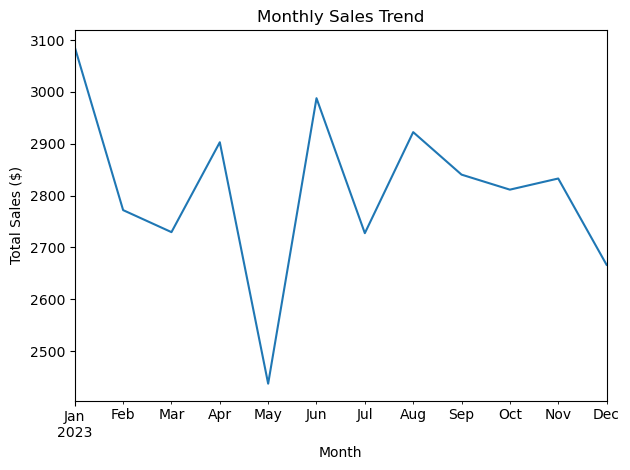

In [30]:
# Total sales over time
monthly_sales = df.resample('M', on='Transaction Date')['Total Spent'].sum()
monthly_sales.plot(kind = 'line', title='Monthly Sales Trend',ylabel='Total Sales ($)', xlabel='Month')
plt.grid=True
plt.tight_layout()
plt.show()

In [55]:
top_items = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)

df['Item'] = df['Item'].replace("ERROR", pd.NA)
df['Item'] = df['Item'].replace("UNKNOWN", pd.NA)
df['Total Spent'] = df['Total Spent'].replace("UNKNOWN", pd.NA)
df['Total Spent'] = df['Total Spent'].replace("ERROR", pd.NA)

In [34]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

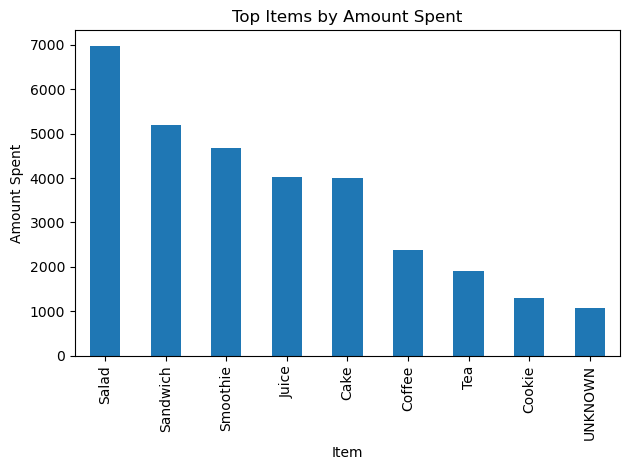

In [56]:
top_items.plot(kind='bar')
plt.title("Top Items by Amount Spent")
plt.ylabel("Amount Spent")
plt.tight_layout()
plt.show()

In [61]:
# Top 5 highest and lowest sales
print("Top 5 biggest transactions:\n", df.sort_values(by="Total Spent", ascending=False).head())
print("\nBottom 5 transactions:\n", df.sort_values(by='Total Spent', ascending=False).head())

Top 5 biggest transactions:
      Transaction ID   Item  Quantity  Price Per Unit  Total Spent  \
3029    TXN_1755817  Salad       5.0             5.0         25.0   
270     TXN_1773873  Salad       5.0             5.0         25.0   
3383    TXN_9190061  Salad       5.0             5.0         25.0   
1437    TXN_6652858  Salad       5.0             5.0         25.0   
2430    TXN_8124795  Salad       5.0             5.0         25.0   

      Payment Method  Location Transaction Date  
3029  Digital Wallet  Takeaway       2023-07-17  
270      Credit Card  Takeaway       2023-06-10  
3383            Cash  Takeaway       2023-06-14  
1437     Credit Card  In-store       2023-09-13  
2430            <NA>  In-store       2023-08-11  

Bottom 5 transactions:
      Transaction ID   Item  Quantity  Price Per Unit  Total Spent  \
3029    TXN_1755817  Salad       5.0             5.0         25.0   
270     TXN_1773873  Salad       5.0             5.0         25.0   
3383    TXN_9190061  Sal

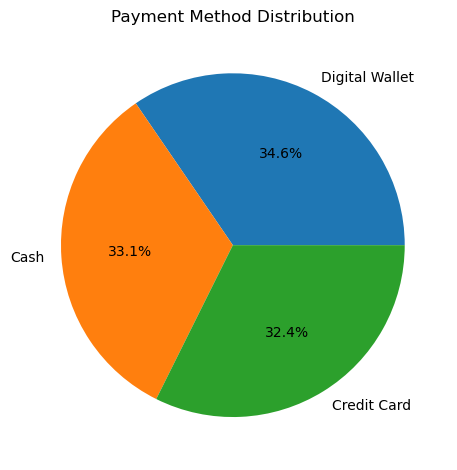

In [66]:
df['Payment Method'] = df['Payment Method'].replace('ERROR', pd.NA)

df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Payment Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()